**Load necessary modules**

In [9]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate as sr
import matplotlib.pyplot as plt
import pandas as pd

**Find good-bad initializations**

In [10]:
bra = sr.BatchRunAnalyzer_SMLR(save_folder='../data/L63-SMLR-0')
data = bra.get_data()
tau_lims = [0.5, 5.]
good, bad = [], []
for idx, row in data.iterrows():
    if row['i'] > 0 and row['j'] > 0:
        if row['tau_f'] < tau_lims[0]:
            bad.append([int(row['i']), int(row['j']), int(row['k'])])
        elif row['tau_f'] > tau_lims[1]:
            good.append([int(row['i']), int(row['j']), int(row['k'])])

**Calculate random features for the selected models**

In [13]:
L63_data_folder = '../data/L63-trajectories'
u0 = np.load('{}/validation.npy'.format(L63_data_folder))[:, :1].flatten()
forecast_steps = 150
good_phi, bad_phi = [], []
random_idx = np.random.choice(len(good), size=2, replace=False)
for idx in [good[i] for i in random_idx]:
    model = bra.get_model(*idx)
    u = model.multistep_forecast(u0, forecast_steps)[:, -1]
    good_phi.append(model.phi(u))
good_phi = np.array(good_phi)
random_idx = np.random.choice(len(bad), size=2, replace=False)
for idx in [bad[i] for i in random_idx]:
    model = bra.get_model(*idx)
    u = model.multistep_forecast(u0, forecast_steps)[:, -1]
    bad_phi.append(model.phi(u))
bad_phi = np.array(bad_phi)

**Plot histograms**

Text(0.5, 1.0, 'Bad $\\tau_f<0.50$')

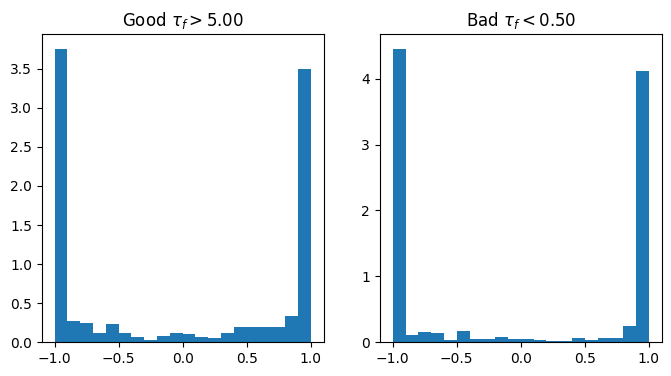

In [14]:
nbins = 20
fig = plt.figure(figsize=(8, 4))
ax_g = fig.add_subplot(121)
ax_b = fig.add_subplot(122)
ax_g.hist(good_phi.flatten(), density=True, bins=nbins);
ax_g.set_title(r'Good $\tau_f>{:.2f}$'.format(tau_lims[1]))
# ax_g.legend()
ax_b.hist(bad_phi.flatten(), density=True, label=r'$\tau_f$', bins=nbins);
ax_b.set_title(r'Bad $\tau_f<{:.2f}$'.format(tau_lims[0]))
# ax_b.legend()